### 1. Gunakan lah dataset yang disediakan serta lakukanlah data preparation. (Gunakan semuaatribut, termasuk target variabel pada kolom ‘Drug’)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename='drug200.csv'
df=pd.read_csv(filename)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### 2. Buat 3 visualisasi berdasarkan dataset tersebut dan sertakan maksud dari visualisasi tersebut.

<AxesSubplot: xlabel='BP', ylabel='count'>

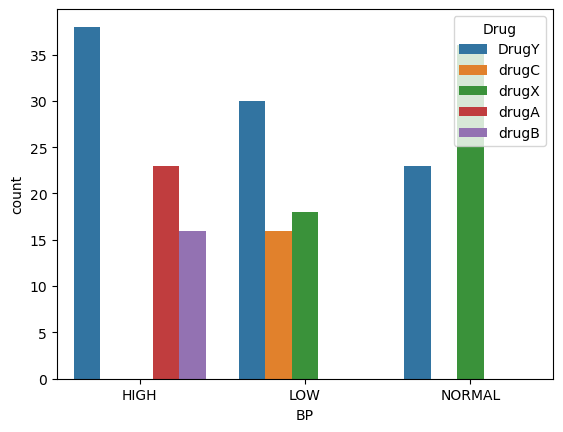

In [ ]:
sns.countplot(data=df, x='BP', hue='Drug')

#### Visualisasi Diatas memperlihatkan persebaraan data BP terhadap data target 'Drug'

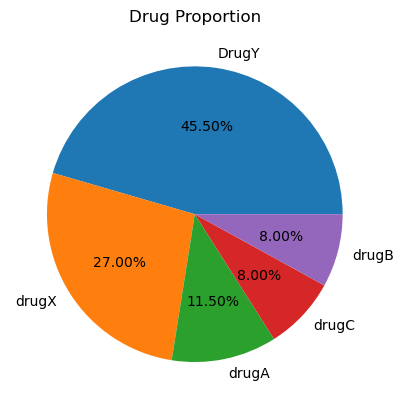

In [ ]:
plt.title("Drug Proportion")
labels = ["DrugY", "drugX","drugA","drugC","drugB"]
sizes = df["Drug"].value_counts()
plt.pie(sizes,labels=labels,autopct='%.2f%%')
plt.show()

#### Visualisasi Diatas memperlihatkan jumlah data dari setiap kelas target, dapat dilihat persebaran data target 'Drug' tidak merata

<AxesSubplot: xlabel='Age', ylabel='Cholesterol'>

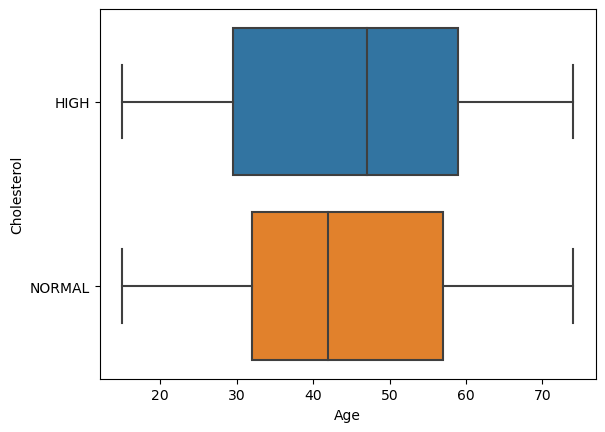

In [ ]:
sns.boxplot(x = 'Age', y = 'Cholesterol', data = df)

#### Visualisasi Diatas memperlihatkan boxplot persebaran data cholestrol pada umur

### 3. Lakukanlah data preparation. Perhatikan kolom-kolom yang bertipe data kategorikal, anda dapat menggunakan one-hot encoding

### 4. Pisahkan dataset yang sudah dibaca tadi menjadi data test dan train

In [ ]:
X=df[df.columns[0:5]]
X = pd.get_dummies(X)
y=df[df.columns[5]]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
test_size=0.30
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=test_size,random_state=42)

### 5. Buatlah model menggunakan algoritma SVM, kemudian latihlah model menggunakan data train

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lin_clf =LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

### 6. Tampilkan accuracy, coefficient dan intercept dari proses training.

In [ ]:
y_pred=lin_clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy Score :",accuracy)
print("Coefficient :",lin_clf.coef_.mean())
print("Intercept :",lin_clf.intercept_.mean())

Accuracy Score : 0.9666666666666667
Coefficient : -0.036906754166237246
Intercept : -1.607237299939499


### 7. Carilah Hyperparameter yang terbaik untuk model dengan minimal param_grid yaitu 3

In [ ]:
param_distrib = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'dual': [True, False]
}

In [ ]:
grid_search_cv = GridSearchCV(lin_clf,param_distrib)

In [ ]:
grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'dual': [True, False],
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_search_cv.best_params_

{'C': 10.0, 'dual': False, 'penalty': 'l1'}

In [ ]:
y_predt=grid_search_cv.predict(X_test)
accuracy=accuracy_score(y_test, y_predt)
print("Accuracy Score :",accuracy)

Accuracy Score : 0.9833333333333333
